In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [521]:
#Reading file from directory

In [522]:
game_row_data = pd.read_csv("M:/ce889_dataCollection_set3_good.csv")
dataframe = pd.DataFrame(game_row_data)

In [523]:
dataframe.head()

,distance x,distance y,velocity x,velocity y
0,25.142149,65.144014,5.694243,-0.039372
1,49.536698,67.556081,5.690106,-3.309881
2,25.142777,70.738257,5.594243,0.000628
3,46.186817,73.146187,5.590106,-3.349881
4,25.103405,76.232501,5.494243,-0.039372


In [524]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance x  3697 non-null   float64
 1   distance y  3697 non-null   float64
 2   velocity x  3697 non-null   float64
 3   velocity y  3697 non-null   float64
dtypes: float64(4)
memory usage: 115.7 KB


In [525]:
desc = dataframe.describe()
desc

,distance x,distance y,velocity x,velocity y
count,3697.000000,3697.000000,3697.000000,3697.000000
mean,-101.524542,419.386065,0.398747,-0.181167
std,102.318430,126.516211,1.779625,0.715287
min,-297.001526,65.144014,-3.763255,-4.949881
25%,-177.473659,342.064179,-0.977152,-0.271661
50%,-96.035702,438.123968,0.335803,-0.095635
75%,-24.376552,508.712613,1.633709,-0.007542
max,219.661910,641.871080,5.694243,2.789426


In [526]:
#Checking null values

In [527]:
dataframe.isnull().sum()

distance x    0
distance y    0
velocity x    0
velocity y    0
dtype: int64

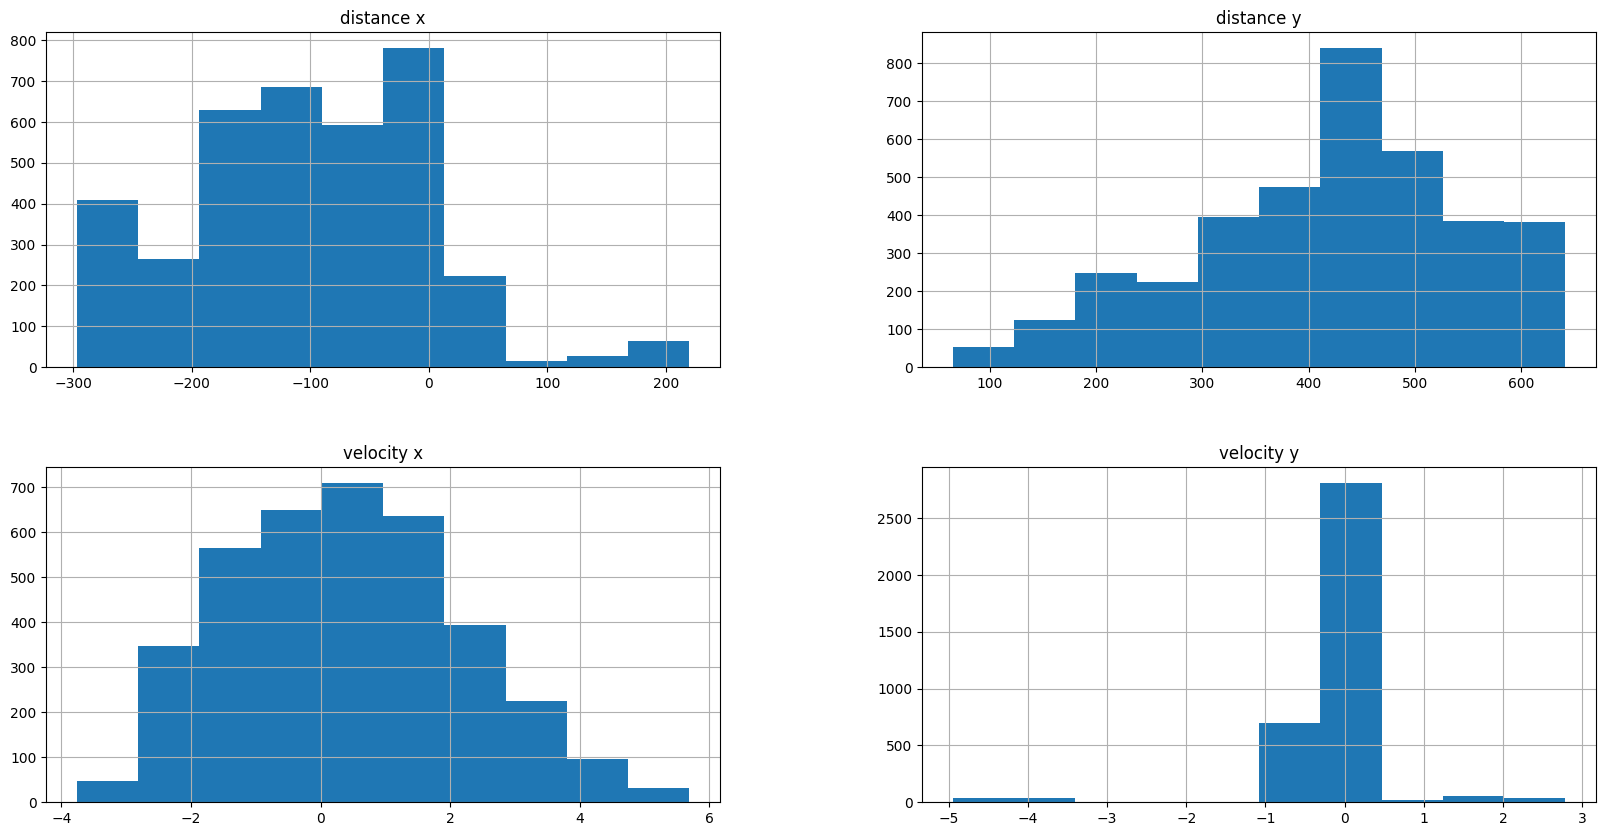

In [528]:
dataframe.hist(figsize=(20,10))
plt.show()

In [529]:
#Shuffling the data

In [530]:
dataframe.sample(frac=1)

,distance x,distance y,velocity x,velocity y
2785,-76.605231,328.186321,-1.001884,-0.542220
3443,-250.765334,581.990276,-2.144464,-0.500995
1461,-68.322480,490.533607,0.857656,-0.020176
1331,4.370681,292.950404,1.035803,-0.011240
559,-7.451511,361.228722,2.280346,0.029288
...,...,...,...,...
2618,-130.745893,447.511816,-0.740539,-0.337488
2953,-94.369798,516.542443,-1.276158,-0.174004
380,-91.418851,365.239470,2.760482,-0.206845
250,-178.044603,571.426976,3.220938,0.033132


In [531]:
#Normalisation

In [532]:
def normalisation(min, max, dataframe):
    normalised = []
    dist_vel = dataframe
    for i in dist_vel:
        norm = ((i - min)/(max- min))
        normalised.append(norm)
    return normalised    
    

In [533]:
norm_dist_x = normalisation(desc['distance x'][3],desc['distance x'][7], dataframe['distance x'])
norm_dist_y = normalisation(desc['distance y'][3],desc['distance y'][7], dataframe['distance y'])
norm_vel_x = normalisation(desc['velocity x'][3],desc['velocity x'][7], dataframe['velocity x'])
norm_vel_y = normalisation(desc['velocity y'][3],desc['velocity y'][7], dataframe['velocity y'])

In [534]:
game_processed_data = pd.DataFrame(zip(norm_dist_x, norm_dist_y, norm_vel_x, norm_vel_y))
game_processed_data.columns = ["distance_x", "distance_y", "velocity_x", "velocity_y"]
game_processed_data
game_processed_data.to_csv("M:\splittest.csv", index = False)

In [535]:
x = game_processed_data[["distance_x", "distance_y"]]
y = game_processed_data[["velocity_x", "velocity_y"]]

In [536]:
# Splitting the data into Training and validation

In [537]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.15, shuffle = True, random_state = 4)

In [538]:
print("X_train shape: {}".format(X_train.shape))
print("X_validation shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_validation shape: {}".format(y_val.shape))

X_train shape: (3142, 2)
X_validation shape: (555, 2)
y_train shape: (3142, 2)
y_validation shape: (555, 2)


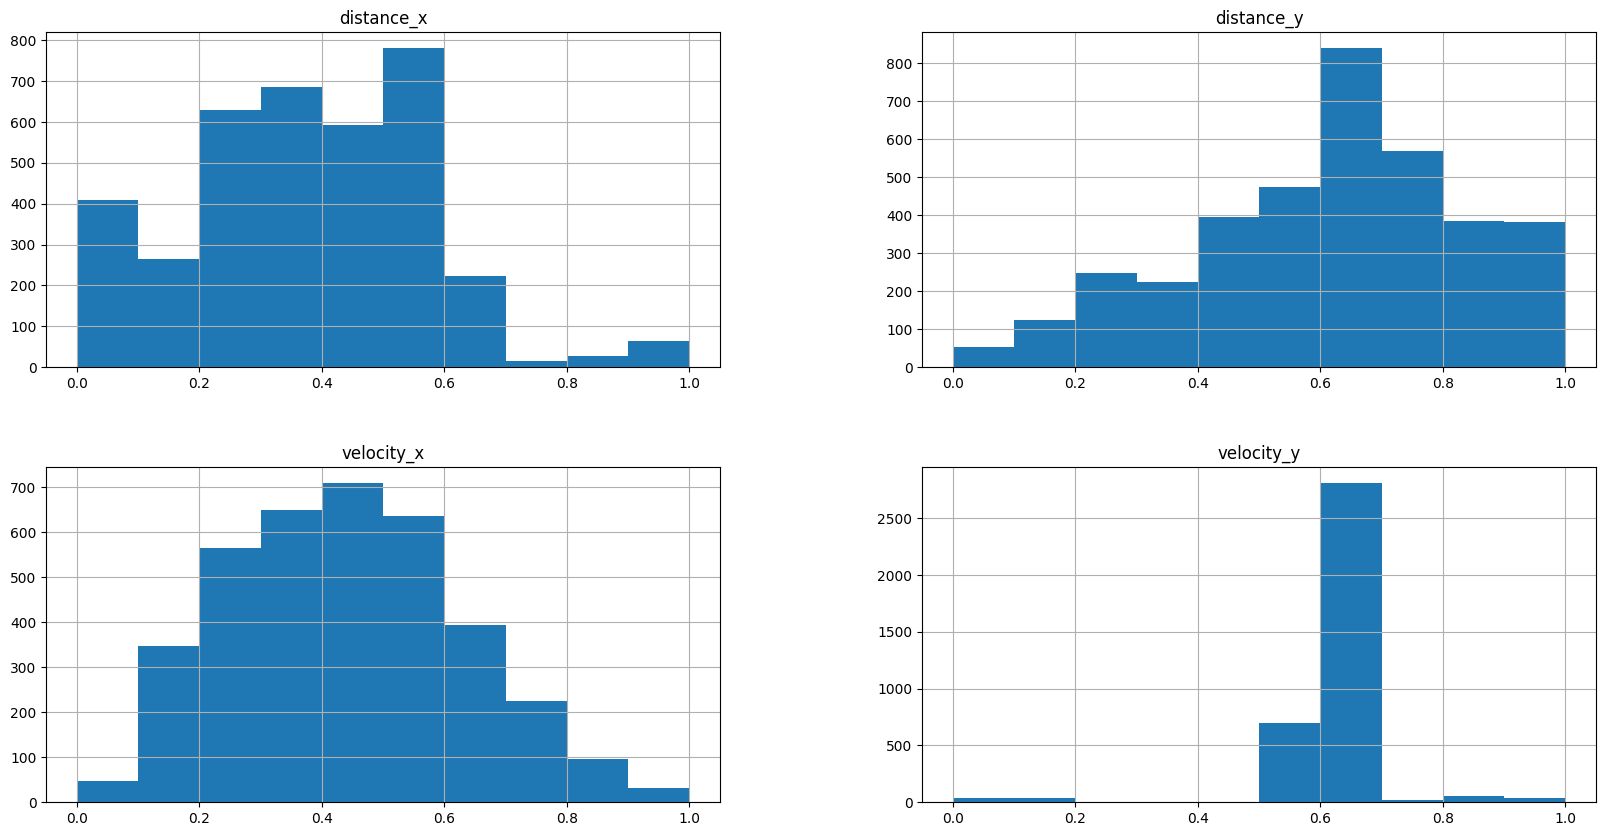

In [539]:
game_processed_data.hist(figsize=(20,10))
plt.show()

In [540]:
traing_data = pd.concat([X_train, y_train], axis=1, join='inner')
validation_data = pd.concat([X_val, y_val], axis=1, join='inner')

In [541]:
game_processed_data = traing_data

In [542]:
#Saving the normalisation data to directory

In [543]:
game_processed_data.to_csv("M:\game_normalized_data.csv", index = False)

In [544]:
#Validation data Formating the data in to required format for the processing

In [545]:
game_final_data = []
game_data_list = list(map(list, game_processed_data.to_numpy()))
for lst in game_data_list:
    index1 = slice(0,2)
    index2 = slice(2,4)
    distance = lst[index1]
    velocity = lst[index2]
    game_final_data.append(list(zip(distance,velocity)))

In [546]:
file_input_rows = game_final_data

In [547]:
#Validation data Formating the data in to required format for the processing

In [548]:
game_validation_data = []
game_data = list(map(list, validation_data.to_numpy()))
for lst in game_data:
    index1 = slice(0,2)
    index2 = slice(2,4)
    distance = lst[index1]
    velocity = lst[index2]
    game_validation_data.append(list(zip(distance,velocity)))    

In [549]:
class neural_network_back_propogtaion:
    
    def __init__(self):
        self._eetta = 0.9
        self._lambda = 0.8 
        self._alpha = .03
        
    def activation_function(self, input_data, inp_weights):
        v_results = np.dot(input_data, np.transpose(inp_weights))
        hidden_layer_values = [(lambda v: 1 / (1 + math.exp(-self._lambda * v)))(v) for v in v_results]
        return hidden_layer_values 

    def out_gradient(self, distance, output_hidden_layer_values,error_list):
        for i in range(len(distance)):
            outgradient = (self._lambda * output_hidden_layer_values[i] * (1 - output_hidden_layer_values[i]) * error_list[i])  
            outgradient_list.append(outgradient)
        return outgradient_list 

    def local_gradient(self, outgrad_list, out_weights, hdn_layer_values):
        local_gradient_dotproduct = np.dot(outgrad_list, out_weights)
        local_gradient_h_value = [(lambda h: self._lambda * h * (1-h))(h) for h in hdn_layer_values]
        local_gradients = [(lambda i: local_gradient_dotproduct[i] * local_gradient_h_value[i])(i) for i in range(len(local_gradient_dotproduct))]
        return local_gradients

    def delta_output_weight_updation(self, output_weights, outgrad_list, previous_row_delta_wgts):
        output_delta_weights = [[None for _ in range(len(output_weights[0]))] for _ in range(len(output_weights))]
        for i in range(len(output_weights)):
                for j in range(len(output_weights[0])):
                    output_delta_weights[i][j] = output_weights[i][j] * outgrad_list[i] * self._eetta + (self._alpha * previous_row_delta_wgts[i][j])
        return output_delta_weights

    def delta_input_weight_updation(self, input_weights, local_gradients, previous_row_input_delta_weights):
        input_delta_weights = [[None for _ in range(len(input_weights[0]))] for _ in range(len(input_weights))]
        for i in range(len(input_weights)):
                for j in range(len(input_weights[0])):
                    input_delta_weights[i][j] = input_weights[i][j] * local_gradients[i] * self._eetta + (self._alpha * previous_row_input_delta_weights[i][j])
        return input_delta_weights

    def weight_updation(self, output_delta_weights, output_weights):
        output_updated_weights = [[None for _ in range(len(output_delta_weights[0]))] for _ in range(len(output_delta_weights))]
        for i in range(len(output_delta_weights)):
            for j in range(len(output_delta_weights[0])):
                output_updated_weights[i][j] = output_delta_weights[i][j] + output_weights[i][j]
        return output_updated_weights 

    def rmse_value_calculation(self, rmse_list):
        square_error = np.square(rmse_list)
        meansquare_err = square_error.mean()
        meansquare_err = math.sqrt(meansquare_err)
        return meansquare_err

    def validation_values(self, game_validation_data, weight_store):
        for distance, velocity in game_validation_data:
            input_weights = weight_store[_input_w_value_] 
            v_results = np.dot(distance, np.transpose(input_weights))
            hidden_layer_values = [(lambda v: 1 / (1 + math.exp(-self._lambda * v)))(v) for v in v_results]
            output_weights = weight_store[_output_w_value_]
            output_v_results = np.dot(hidden_layer_values, np.transpose(output_weights))
            output_hidden_layer_values = [(lambda v: 1 / (1 + math.exp(-self._lambda * v)))(v) for v in output_v_results]
            error_list = np.subtract(np.array(velocity), np.array(output_hidden_layer_values))
            AverageError = (abs(error_list[0]) + abs(error_list[1]))/len(error_list)
            RMSE_Validation.append(AverageError)
        return RMSE_Validation 

    
validation = []
validation_store = {}
epoch_store = {}
weight_store = {}
epoch_validation_store = {}
_x_values_count = 2
_hidden_neuron_count = 7
_input_w_value_ = "input_w_value"
_output_w_value_ = "output_w_value"
_delta_input_w_value_ = "delta_input_w_value"
_delta_output_w_value_ = "delta_output_w_value"
val_input_w_value_ = "val_input_w_value"
val_output_w_value_ = "val_output_w_value"
_RMSE = "RMSE"
nn = neural_network_back_propogtaion()
input_random_weights = [[random.random() for _ in range(_x_values_count)] for _ in range(_hidden_neuron_count)]

for epoch in range (1, 1000):
    
    # Reinitializing the rmse training and validation list after each epoch
    RMSE_training = []
    RMSE_Validation = []
    
    # Feed forward and back propogation loop starting
    for distance, velocity in file_input_rows:
        outgradient_list = []
        
        # Feed foward#
        #-------------#
        
        #If weight is not there in the dictionary code will take random weighr else will take last updated weight in dictionary.
        input_weights = weight_store[_input_w_value_] if _input_w_value_ in weight_store else input_random_weights
       
        #Taking dot product of input and input weight for getting value of V and finding the activation function
        hidden_layer_values = nn.activation_function(distance,input_weights)
        
        #Matric with number of column = number of hidden neuron count and rows = number of output
        output_random_weights = [[random.random() for _ in range(len(hidden_layer_values))] for _ in range(len(velocity))]
        
        #output random weights will be assined as random if there no updated weight values in the store
        output_weights = weight_store[_output_w_value_] if _output_w_value_ in weight_store else output_random_weights
        
        #Taking dot product of hidden_layer_values and transpose of output_weights for getting V values to find activation function in output layer
        output_hidden_layer_values = nn.activation_function(hidden_layer_values,output_weights)
        
        
        
        # Back Propogation#
        #-------------------#
        
        #Finding errors Actual - predicted 
        error_list = np.subtract(np.array(velocity), np.array(output_hidden_layer_values))
   
        #Outgradient calculation
        outgradient_list = nn.out_gradient(distance, output_hidden_layer_values,error_list)
        
        # taking previous rows delta weight for getting alpha value for output delta weight
        previous_row_out_delta_weights = weight_store[_delta_output_w_value_] if _delta_output_w_value_ in weight_store else [[0 for _ in range(len(output_weights[0]))] for _ in range(len(output_weights))]
        
        #delta weight calculation for weight s between hidden layer and output
        output_delta_weights = nn.delta_output_weight_updation(output_weights, outgradient_list, previous_row_out_delta_weights)
        
        
        # Storing delta weight values to dictionary
        weight_store[_delta_output_w_value_] = output_delta_weights
       
        # weight updation      
        output_updated_weights = nn.weight_updation(output_delta_weights, output_weights)
        
        # Storing updated weight values to dictionary        
        weight_store[_output_w_value_] = output_updated_weights
        
        #Local gradient calculation
        local_gradients = nn.local_gradient(outgradient_list, output_weights, hidden_layer_values)
        
        # taking previous rows delta weight for getting alpha value for input delta weight calculation
        previous_row_input_delta_weights = weight_store[_delta_input_w_value_] if _delta_input_w_value_ in weight_store else [[0 for _ in range(len(input_weights[0]))] for _ in range(len(input_weights))]
        
        #Input delta weight calculation        
        input_delta_weights = nn.delta_input_weight_updation(input_weights, local_gradients, previous_row_input_delta_weights)
        weight_store[_delta_input_w_value_] = input_delta_weights
        
        #Input weight updation
        input_updated_weights = nn.weight_updation(input_delta_weights, input_weights) 
        
        #Storing updated input weight to dictionary
        weight_store[_input_w_value_] = input_updated_weights
     
    
    # RMSE Calculation - taking average error of each row and appending it to RMSE_training list and calculating RMSE VALUES
        AverageError = (abs(error_list[0]) + abs(error_list[1]))/len(error_list)
        RMSE_training.append(AverageError)
    epoch_store[epoch] = nn.rmse_value_calculation(RMSE_training)    

    
    #----------Validation-------------#
    
 
    RMSE_Validation = nn.validation_values(game_validation_data, weight_store)
    
    #RMSE calculation for validation set
    rmse_validation = nn.rmse_value_calculation(RMSE_Validation)
    epoch_validation_store[epoch] = rmse_validation
    
    validation_store[rmse_validation] = weight_store
    
# Stopping criteria -  taking the minimum RMSE Value of validation and corresponding weight

sorted_validation_store = min(validation_store.keys())
print(f'Minimum RMSE Value : {sorted_validation_store}, Weights : {validation_store[sorted_validation_store]} ')

Minimum RMSE Value : 0.13629345113692495, Weights : {'delta_output_w_value': [[-0.006450148133316503, -0.00441401445458795, -0.005368221614825543, -0.007033252313977421, -0.00025037120633760335, -0.005801070918114849, -0.005678880744667735], [0.0002825318463910918, 0.00013732839588117993, 9.25886552873615e-05, 6.534971179793891e-05, 0.00012913039391658588, 0.00010908396640075446, 0.00023438852894723126]], 'output_w_value': [[0.10124353884973095, 0.06928374894338579, 0.08426128243586593, 0.11039612411568042, 0.003929904621068231, 0.09105542023671626, 0.08913748512627291], [0.1887082126733756, 0.09172415947817313, 0.06184166449301261, 0.04364827352962814, 0.08624856330028279, 0.07285918594222579, 0.15655240615795007]], 'delta_input_w_value': [[1.957381992949863e-17, 1.9929038139196968e-17], [2.204855392673071e-22, 7.778655153118227e-23], [6.814216539139071e-16, 1.064360336059536e-15], [2.7335088674438937e-16, 4.010307964985298e-16], [-5.795037855695471e-06, -4.787413955896191e-06], [1.12

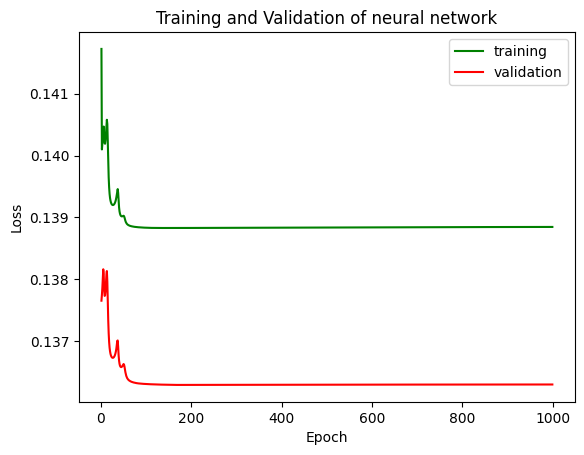

In [551]:
# Plotiing the graph for RMSE of training and validation against Loss function   
xaxis = list(epoch_store.keys())
yaxis = list(epoch_store.values())
plt.plot(xaxis,yaxis,  color='g', label='training') 
xaxis_val = list(epoch_validation_store.keys())
yaxis_val = list(epoch_validation_store.values())
plt.plot(xaxis_val,yaxis_val,  color='r', label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation of neural network")
plt.legend()
plt.show()